<a href="https://colab.research.google.com/github/samsas556/ELE400Pitot_Omer/blob/main/Lab2_ELE767.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

178/178 [==============================] - 0s 1ms/step - loss: 2.1850 - accuracy: 0.2472
Epoch #1 
178/178 [==============================] - 0s 2ms/step - loss: 0.8702 - accuracy: 0.8202
Epoch #2 
178/178 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.9157
Epoch #3 
178/178 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8933
Epoch #4 
178/178 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8933
Epoch #5 
178/178 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.8933
Epoch #6 
178/178 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.8933
Epoch #7 
178/178 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8933
Epoch #8 
178/178 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.8933
Epoch #9 
178/178 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.8933
Epoch #10 
178/178 [

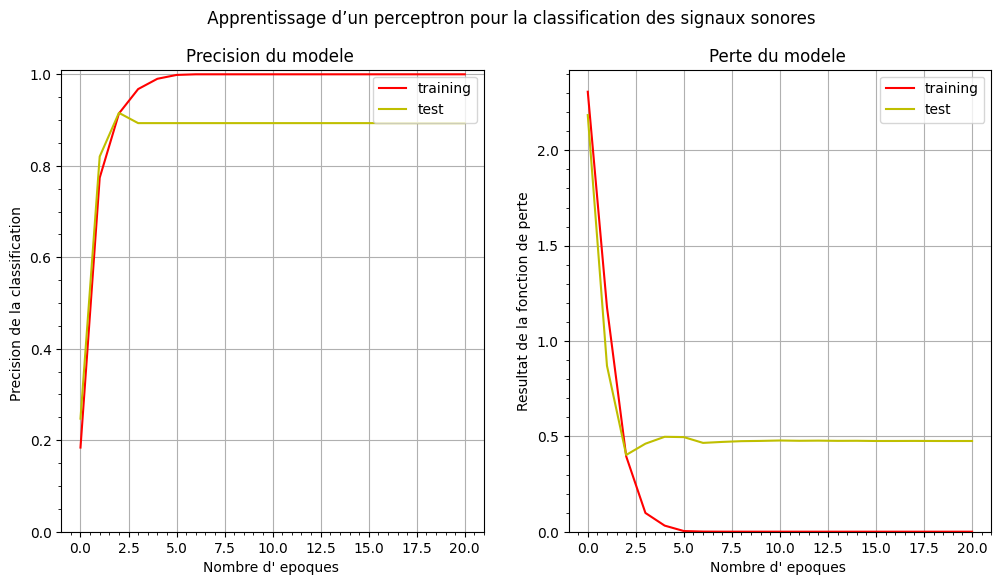

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn . model_selection import KFold





def training( model , data_ds , epochs =10 , n_fold =5 , verbose_train =1 , verbose_test=1) :
  """
  TRAINING
  Fonction servant a entrainer un model et en verifiant les capacites du modele
  sur les donnees de test
  @Arguments :
    model { tensorflow . python . keras . engine . sequential . Sequential } : Modele
    tensorflow a entrainer
    data_ds {pd. DataFrame } : Base de donnees d’ entrainement
    epochs { int } : Nombre d’epoques a faire pour l’ entrainement du model
    n_fold { int } : Nombre de fold pour le kfold
    verbose_train { int } : 1 pour afficher l’avancement de l’apprentissage ,
    0 aucun affichage
    verbose_test { int} : 1 pour afficher l’avancement de l’evaluation ,
    0 aucun affichage
    @Return :
    { dict } : ’ train_accuracy ’ { list } : liste de la precision du modele sur la
    base de donnees d’ entrainement
    ’train_loss ’ { list } : liste des resultat de la fonction de
    perte du modele sur la base de donnees d’ entrainement
    ’ test_accuracy ’ { list } : liste de la precision du modele sur
    la base de donnees de test
    ’test_loss ’ { list } : liste des resultats de la fonction de
    perte du modele sur la base de donnees de test
  """
  # Initialisation des listes recevants
  train_accuracy = []
  train_loss = []
  test_accuracy = []
  test_loss = []

  # Creer les bases de donnees pour l’ entrainement
  train_set , test_set = create_sets ( data_ds , n_fold )

  # Evaluer le modele avant l’ entrainement
  result = model . evaluate ( train_set , verbose = verbose_train )
  train_accuracy . append ( result [1])
  train_loss . append ( result [0])
  # ---
  result = model . evaluate ( test_set , verbose = verbose_test )
  test_accuracy . append ( result [1])
  test_loss . append ( result [0])

  # Boucle d’ entrainement

  for e in range(epochs):
    print ('Epoch #{} '.format(e +1))
    # ---
    result = model.fit(train_set , epochs=1 , verbose = verbose_train)
    train_accuracy.append( result.history['accuracy'][-1])
    train_loss.append(result.history['loss'][-1])
    # ---
    result = model.evaluate( test_set , verbose = verbose_test )
    test_accuracy.append( result[1])
    test_loss.append( result[0])

  return {'train_accuracy': train_accuracy ,
          'train_loss': train_loss ,
          'test_accuracy': test_accuracy ,
          'test_loss': test_loss }

def figure( training_dict , suptitle , figsize =(12 ,6) ):
  """
  FIGURE
  Produit une figure avec les statistiques de la fonction ’training ’
  @Arguments :
  training_dict { dict ( list )} : Dictionnaire retournee par la fonction
  training
  figsize { Tuple } : Dimension de la figure
  """
  # Demarre une figure avec la taille (en pouce ) donner en arguments
  plt.figure(figsize = figsize , facecolor ='w')
  # Titre global de la figure
  plt.suptitle( suptitle )
  # Premiere sous - figure -> Precision du modele durant l’ entrainement
  plt.subplot(121)
  plt.title('Precision du modele ')
  plt.xlabel('Nombre d\' epoques ')
  plt.ylabel('Precision de la classification ')
  # Produit une courbe pour chaque base de donnees
  plt.plot(training_dict['train_accuracy'], 'r', label ='training')
  plt.plot(training_dict['test_accuracy'], 'y', label ='test')
  # Limite de la precision pour rendre les valeurs entre 0% et 100% visibles
  plt.ylim(0 ,1.01)
  # Produire un grille en arriere - plan
  #plt.grid(b=True , which ='major', color = '#666666 ' , linestyle = '-')
  plt.grid()
  plt.minorticks_on()
  #plt.grid(b= True , which ='minor ', color ='#999999 ', linestyle ='-', alpha =0.2)
  plt.legend() # Afficher les labels des courbes
  # Deuxieme sous - figure -> Resultat de la fonction de perte durant l’entrainement
  plt.subplot(122)
  plt.title('Perte du modele ')
  plt.xlabel('Nombre d\' epoques ')
  plt.ylabel('Resultat de la fonction de perte')
  # Produire une courbe pour chaque base de donnees
  plt.plot(training_dict['train_loss'],'r', label ='training')
  plt.plot(training_dict['test_loss'],'y', label ='test');
  # S’assurer que la valeur minimum de l’ordonnee soit 0
  plt.ylim(0);
  # Produire un grille en arriere - plan
  #plt.grid(b=True , which ='major', color = '#666666 ' , linestyle =  '-')
  plt.grid()
  plt.minorticks_on()
  #plt.grid(b= True , which ='minor', color ='#999999 ', linestyle ='-', alpha =0.2)
  plt.legend()
  plt.savefig("graph.png")
  return

def create_sets(data_ds, n_fold =5):
  """
  CREATE_SETS
    Transforme les bases de donnees afin d’etre compatible avec l’ entrainement
    du modele avec la methode " fit "
  @Arguments :
    data_ds {pd. DataFrame } : Base de donnees d’ entrainement
    n_fold { int } : nombre de division pour le kfold
  @Return :
    { tensorflow.BatchDataset } : Base de donnees d’ entrainement
    { tensorflow.BatchDataset } : Base de donnees de test
  """
  # Melanger les valeurs de la base de donnees
  data = data_ds.sample(frac=1).reset_index(drop=True)

  # Diviser les variables et les resultats
  data_output = data.pop("number")

  # Extraire les indexes pour le kfold une seule fois
  for train_index , test_index in KFold( n_fold ).split( data ) :
    # Creer la base de donnees d’ entrainement
    X_train = (data.values)[train_index]
    y_train = (data_output.values )[train_index]
    ### Creer la base de donnees de test
    X_test = (data.values) [test_index]
    y_test = (data_output.values)[test_index]
    break

  # Transformer les bases de donnees pour etre utilisees directement dans fit
  # Les donnees sont melangees une autre fois avant d’etre retournees
  train_set = tf.data.Dataset.from_tensor_slices((X_train,y_train))
  train_set = train_set.shuffle(len(X_train))
  train_set = train_set.batch(1)

  test_set = tf.data.Dataset.from_tensor_slices((X_test,y_test))
  test_set = test_set.shuffle(len(X_test))
  test_set = test_set.batch(1)

  return train_set , test_set


#============================main code =============================#


data_set = pd.read_csv("data.csv")
#print (" __data__ ")
#print (data_ds.info())
#print (data_ds.head())
#print (data_ds.tail())

# Creer un modele sequentiel
perceptron = tf.keras.Sequential([layers.Dense(4 , activation='sigmoid', dtype ='float64')])
# Compiler le modele pour l’ entrainement
perceptron.compile(optimizer ='SGD',loss = tf.keras.losses.SparseCategoricalCrossentropy() ,metrics =['accuracy'])

result = training(perceptron,data_set,epochs=20)
figure( result , " Apprentissage d’un perceptron pour la classification des signaux sonores ")

perceptron.save('modeles/perceptron')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')